In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
oversample = SMOTE()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score

In [5]:
#%%                         Import Dataset
dataset = pd.read_csv('data_new.csv', encoding= 'unicode_escape')
#print(dataset.head(5))
dataset = shuffle(dataset)
dataset = dataset.reset_index(drop=True)
dataset.dropna(inplace=True)
#del dataset['Unnamed: 0']
print("Data shape:",dataset.shape)

# iterating the columns 
for col in dataset.columns: 
    print(col)

Data shape: (1440, 34)
abdominal_pain
dark_urine
yellowish_skin
high_fever
weight_loss
fatigue
vomiting
skin_rash
headache
nausea
pain_behind_the_eyes
malaise
constipation
diarrhoea
continuous_sneezing
cough
phlegm
throat_irritation
runny_nose
loss_of_smell
anxiety
breathlessness
hip_joint_pain
mild_fever
receiving_blood_transfusion
family_history
sweating
fast_heart_rate
abroad travel
contact with COVID Patient
attended large gathering
Visited Public Exposed Places
family working in public exposed places
prognosis


In [6]:
#%%                    Create X and Y variables 

max_len = len(dataset.columns)-1
min_len = 0
dataset = shuffle(dataset)
X = dataset.iloc[:,min_len:max_len].values
x = dataset.iloc[:,min_len:max_len]
y = dataset.iloc[:,max_len].values
y_name = dataset.iloc[:, max_len]
y1 = y
print("X shape:",X.shape)
print("y shape:",y.shape)
X, y = oversample.fit_resample(X, y)
#x, y1 = oversample.fit_resample(x, y1)
print("X shape:",X.shape)
print("y shape:",y.shape)
#print(x)
#print(y)


X shape: (1440, 33)
y shape: (1440,)
X shape: (1440, 33)
y shape: (1440,)


In [7]:
df2 = pd.DataFrame(X, y)
print("df2 shape:",df2.shape)
df2= df2.reset_index()


df2= df2.rename(columns={'index':'prognosis',0: 'abdominal_pain', 1: 'dark_urine', 2: 'yellowish_skin', 3: 'high_fever', 4: 'weight_loss', 5: 'fatigue', 6: 'vomiting', 7: 'skin_rash', 8: 'headache', 9: 'nausea', 10: 'pain_behind_the_eyes', 11: 'malaise', 12: 'constipation', 13: 'diarrhoea', 14: 'continuous_sneezing', 15: 'cough', 16: 'phlegm', 17: 'throat_irritation', 18: 'runny_nose', 19: 'loss_of_smell', 20: 'anxiety', 21: 'breathlessness', 22: 'hip_joint_pain', 23:'mild_fever', 24: 'receiving_blood_transfusion', 25: 'family_history', 26: 'sweating', 27: 'fast_heart_rate', 28: 'abroad travel', 29: 'contact with COVID Patient', 30: 'attended large gathering', 31:'Visited Public Exposed Places', 32:'family working in public exposed places'})
#'index':'prognosis', 0: 'itching', 1: 'skin_rash', 2: 'continuous_sneezing', 3: 'chills', 4: 'joint_pain', 5: 'vomiting', 6: 'fatigue', 7: 'anxiety', 8: 'weight_loss', 9: 'cough', 10: 'high_fever', 11: 'breathlessness', 12: 'headache', 13: 'yellowish_skin', 14: 'dark_urine', 15: 'nausea', 16: 'loss_of_appetite', 17: 'pain_behind_the_eyes', 18: 'back_pain', 19: 'constipation', 20: 'abdominal_pain', 21: 'diarrhoea', 22: 'swelled_lymph_nodes', 23: 'malaise', 24: 'phlegm', 25: 'throat_irritation', 26: 'redness_of_eyes', 27: 'sinus_pressure', 28: 'runny_nose', 29: 'congestion', 30: 'chest_pain', 31: 'hip_joint_pain', 32: 'loss_of_smell', 33: 'toxic_look_(typhos)', 34: 'muscle_pain', 35: 'red_spots_over_body', 36: 'belly_pain'})

print(df2.columns)
print(df2.shape)
df2.columns.get_loc("prognosis")

df2 shape: (1440, 33)
Index(['prognosis', 'abdominal_pain', 'dark_urine', 'yellowish_skin',
       'high_fever', 'weight_loss', 'fatigue', 'vomiting', 'skin_rash',
       'headache', 'nausea', 'pain_behind_the_eyes', 'malaise', 'constipation',
       'diarrhoea', 'continuous_sneezing', 'cough', 'phlegm',
       'throat_irritation', 'runny_nose', 'loss_of_smell', 'anxiety',
       'breathlessness', 'hip_joint_pain', 'mild_fever',
       'receiving_blood_transfusion', 'family_history', 'sweating',
       'fast_heart_rate', 'abroad travel', 'contact with COVID Patient',
       'attended large gathering', 'Visited Public Exposed Places',
       'family working in public exposed places'],
      dtype='object')
(1440, 34)


0

In [8]:
#Correlation value filtering
col_corr = set()
corr_matrix = df2.corr()
print(df2.shape)
for i in range(len(corr_matrix.columns)):
        if (-0.1 < corr_matrix.iloc[i,0] < 0.1) and (corr_matrix.columns[i] not in col_corr):
            colname = corr_matrix.columns[i]
            col_corr.add(colname)
            if colname in df2.columns:
                    del df2[colname]
print(df2.shape)
print(df2.columns)


(1440, 34)
(1440, 30)
Index(['prognosis', 'abdominal_pain', 'dark_urine', 'yellowish_skin',
       'weight_loss', 'fatigue', 'vomiting', 'skin_rash', 'headache', 'nausea',
       'pain_behind_the_eyes', 'malaise', 'constipation', 'diarrhoea',
       'continuous_sneezing', 'cough', 'phlegm', 'throat_irritation',
       'runny_nose', 'loss_of_smell', 'anxiety', 'breathlessness',
       'hip_joint_pain', 'mild_fever', 'fast_heart_rate', 'abroad travel',
       'contact with COVID Patient', 'attended large gathering',
       'Visited Public Exposed Places',
       'family working in public exposed places'],
      dtype='object')


In [9]:
a = df2

In [10]:
a.to_csv('deadly.csv')

(1440, 30)


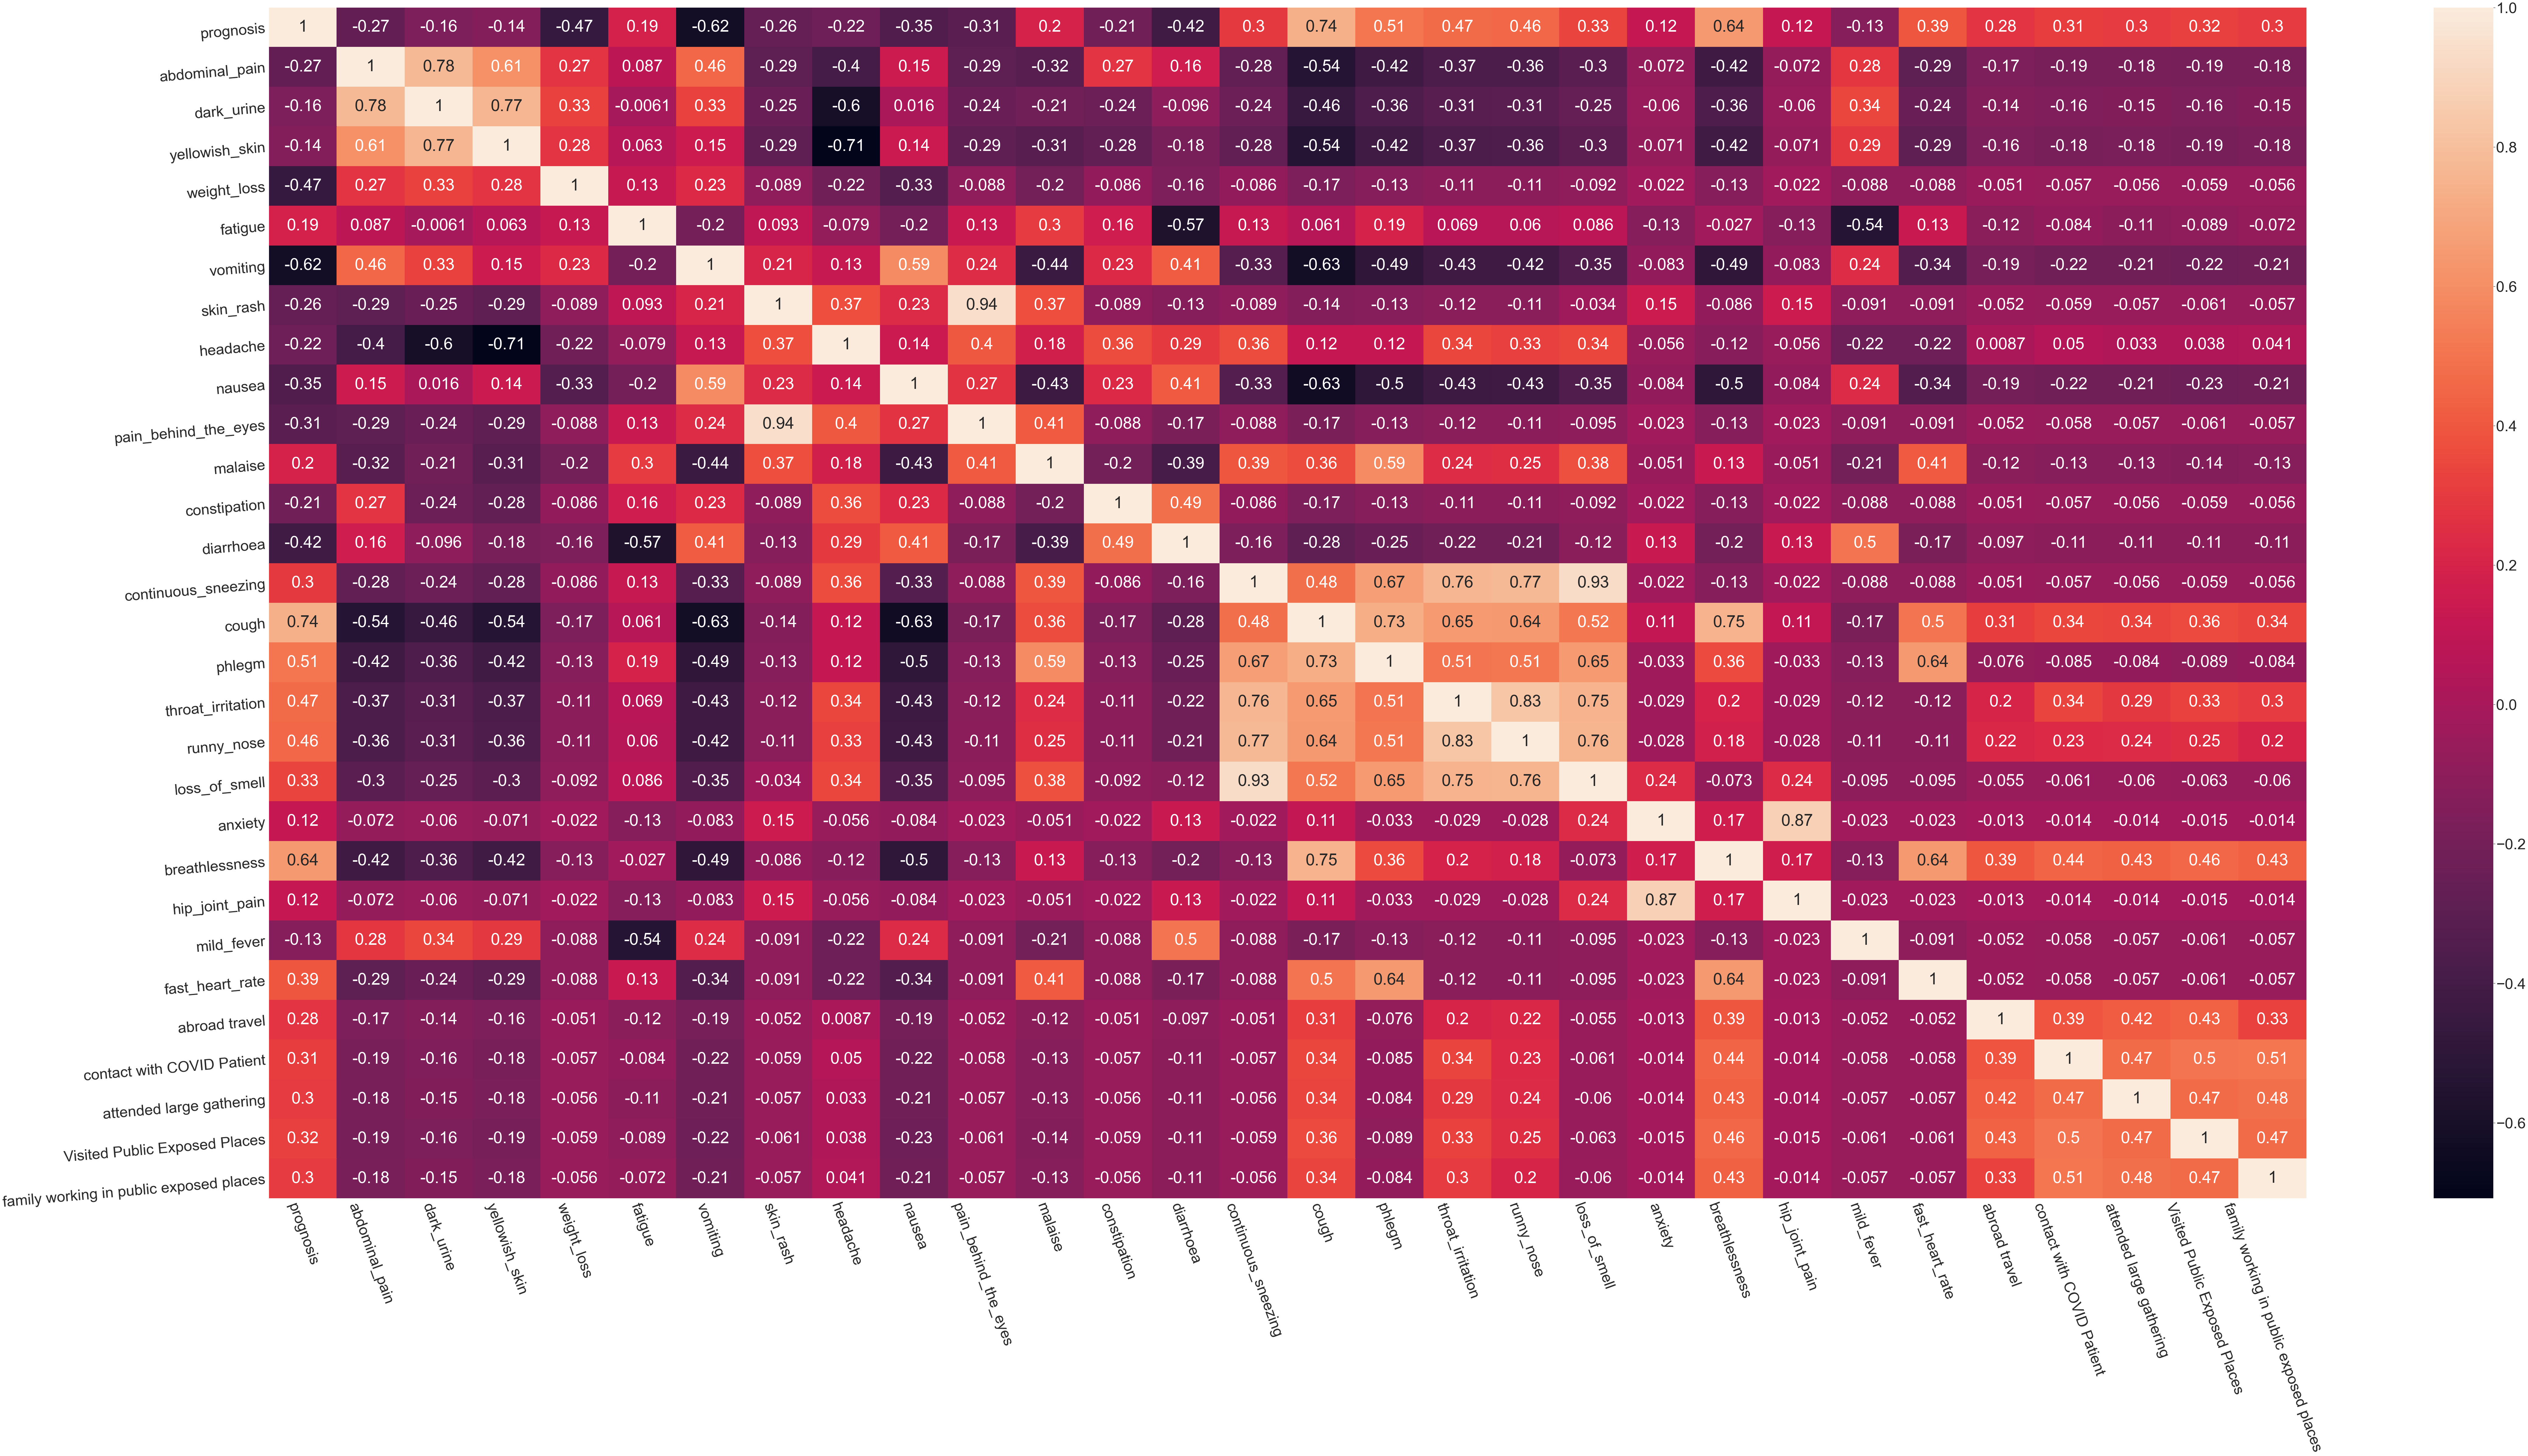

prognosis
abdominal_pain
dark_urine
yellowish_skin
weight_loss
fatigue
vomiting
skin_rash
headache
nausea
pain_behind_the_eyes
malaise
constipation
diarrhoea
continuous_sneezing
cough
phlegm
throat_irritation
runny_nose
loss_of_smell
anxiety
breathlessness
hip_joint_pain
mild_fever
fast_heart_rate
abroad travel
contact with COVID Patient
attended large gathering
Visited Public Exposed Places
family working in public exposed places


In [30]:
#Correlation matrix
print(df2.shape)
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=4.5)
sn.set_style("darkgrid")
fig_dims = (150, 72)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df2.corr(),annot=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-70)
ax.set_yticklabels(ax.get_yticklabels(), rotation=5)
plt.savefig('my_image.png')
plt.show()

for col in df2.columns: 
    print(col)

In [31]:
!zip -r file.zip ./

'zip' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
#%% Initialization
algorithms = ["Logistic Regression","K-nn", "SVM", "Naive Bayes", "Decission Tree", "Random Forest","XgBoost", "AdaBoost", "LightBGM"]
accuracy  = []
precision = []
recall    = []
f1_value  = []

In [32]:
# print function 
def print_summary(ac,pr,re,f):
    print("Accuracy    =", ac)
    print("Precision   =", pr)
    print("Recall      =", re)
    print("F1 Score    =", f)
    print("\n")

In [33]:
# plot function
def plott(x,y,z):
    import matplotlib.pyplot as plt
    import seaborn as sn
    #f = plt.figure()
    sn.set(font_scale=1)
    plt.rcParams['figure.figsize']=20,10
    sn.set_style("darkgrid")
    ax = sn.barplot(x, y, palette = "rocket", saturation =1.5)
    plt.xlabel("Classifier Models", fontsize = 20 )
    plt.ylabel(z, fontsize = 20)
    plt.title(z, fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()
    # z= z.png
    # f.savefig("z", bbox_inches='tight', dpi = 300)

In [34]:
# model score function 
def model_score (y_test,y_pred):
    # Statistical Score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    st = 'macro'  # 'micro',  'macro' , 'weighted' None
    ac  = accuracy_score(y_test, y_pred)   # for multy class
    pre = precision_score(y_test, y_pred, average = st)  # use [accuracy_score(y_test, y_pred, average = st)]
    re  = recall_score(y_test, y_pred, average = st)
    f1  = f1_score(y_test, y_pred, average = st) 
    results = [ac,pre,re, f1]
    return results

In [35]:
# Confusion Matrix Plot
def plot_cm_2(cm):
    import seaborn as sn
    import matplotlib.pyplot as plt  
    sn.set(font_scale=2.5)
    zero = 'Jaundice'
    one  = 'Dengue'
    two  = 'Typhoid'
    three  = 'Common Cold'
    four  = 'Corona'
    five = 'Hepatitis A'
    six = 'Hepatitis B'
    seven = 'Hepatitis C'
    eight = 'Hepatitis D'
    nine = 'Hepatitis E'
    ten = 'Malaria'
    eleven = 'Pneumonia'
    plt.figure(figsize=(20,10))
    ax= plt.subplot()
    sn.heatmap(cm, annot=True, ax = ax,cmap="BuPu"); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels',fontsize = 15);ax.set_ylabel('True labels',fontsize = 15); 
    ax.set_title('Confusion Matrix',fontsize = 20); 
    ax.xaxis.set_ticklabels([zero, one, two, three, four, five, six, seven, eight, nine, ten, eleven],fontsize = 10); ax.yaxis.set_ticklabels([zero, one, two, three, four, five, six, seven, eight, nine, ten, eleven],fontsize = 10);
    plt.show()


In [14]:
#%%                        Checking for null values
dataset.isnull().sum()
print(dataset.isnull().sum())

abdominal_pain                    0
dark_urine                        0
yellowish_skin                    0
high_fever                        0
weight_loss                       0
fatigue                           0
vomiting                          0
itching                           0
skin_rash                         0
chills                            0
joint_pain                        0
headache                          0
nausea                            0
loss_of_appetite                  0
pain_behind_the_eyes              0
back_pain                         0
malaise                           0
muscle_pain                       0
red_spots_over_body               0
constipation                      0
diarrhoea                         0
toxic_look_(typhos)               0
belly_pain                        0
continuous_sneezing               0
cough                             0
swelled_lymph_nodes               0
phlegm                            0
throat_irritation           

In [36]:
#%%               Spliting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#%%                               Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
#%%_______________________________ Train The Model _____________________________________________________________


In [39]:
#%%                   Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0)
classifier_lg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lg = classifier_lg.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)
w = model_score(y_test,y_pred_lg)
print(y_test)
print(y_pred_lg)
accuracy.append(w[0]); precision.append(w[1])
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of logistic Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])


[ 5  4  9  3  8  1  2  5  2 11  0  1  3  8  7 10  9  1  1 11  2  7  7  9
  7 10 11  1  7  5  1  4  5  8  9  9  7  2  1  6 11  5  7  5  6 10  3 10
  7  6  4  4  8  5 10  0  0  1  8  5  6  0 10  6  8  9  3  2  4 10  8  7
  9  3  9  9  2  5  1  9  5  4  2  1  0  7  0  6  1  1  2  8  0  3  5  9
  0 10  3  0  1  0  8  8  4  0  7  7  2  0  6  4  2 10  0  3  7  3  6  4
  4  2  6 11  5  5  6  5  9  0  8  9  1 11  5  4  2 10 10  9  0  2  9  9
 11  4  0  5  8 11  6  3  6 10  3  8 10 10  6  2  1  4 11  2  3  1  1  8
  8 11  0  3  2  7  9  1  0  2  2 11  8 10 11  2  4  7  1  8  3  1  9  9
 10  3  8  7  7 10 10 10  4  7 11 10  2  6  9  8  8  0  8  0  7 11 11 11
  5  3  4  1  6  0  0  4 11  9  5  2  1  2 11  1  9  1 10  7  9 11 10  1
  0 11  7  7  5 11  0  9  7  9  5  5  7  4  2 11  3  6  3  3  4  1 11  0
  9  1  0  5  4 10  7  7  4  9  1  2  2  2  7  8  8  7  8  5  2  2  3  4
  6  9  8  9  3  6  3 10  8  0  8  7  6 11  6  4 11  2  3  5  7  5  0  3
  2  5  5  8  6 11  6 10  4  2  6 10  7  2  4  1  7

In [40]:
#%%                            Fitting K-NN to the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
w = model_score(y_test,y_pred_knn)

accuracy.append(w[0]); precision.append(w[1]) 
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of KNN Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of KNN Algorithm 

Accuracy    = 0.9861111111111112
Precision   = 0.9866452991452991
Recall      = 0.9868055555555556
F1 Score    = 0.986475468975469




In [19]:
#%%                         Fitting SVM to the Training set

from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
w = model_score(y_test,y_pred_svm)

accuracy.append(w[0]); precision.append(w[1]) 
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of SVM Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of SVM Algorithm 

Accuracy    = 0.9861111111111112
Precision   = 0.9866452991452991
Recall      = 0.9868055555555556
F1 Score    = 0.986475468975469




In [41]:
#%%                    Training the Naive Bayes model on the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
w = model_score(y_test,y_pred_nb)

accuracy.append(w[0]); precision.append(w[1])
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of Naive Bayes Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of Naive Bayes Algorithm 

Accuracy    = 0.9861111111111112
Precision   = 0.9866452991452991
Recall      = 0.9868055555555556
F1 Score    = 0.986475468975469




In [42]:
#%%                  Fitting Decision Tree Classification to the Training set

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # entropy, gini
classifier_dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

w = model_score(y_test,y_pred_dt)

accuracy.append(w[0]); precision.append(w[1])
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of Decision Tree Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of Decision Tree Algorithm 

Accuracy    = 0.9861111111111112
Precision   = 0.9877757901013715
Recall      = 0.9861111111111112
F1 Score    = 0.986078860898138




In [22]:
#%%                Fitting Random Forest Classification to the Training set

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0) #'entropy' ,'gini'
classifier_rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
w = model_score(y_test,y_pred_rf)

accuracy.append(w[0]); precision.append(w[1]) 
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of Random Forest Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of Random Forest Algorithm 

Accuracy    = 0.9861111111111112
Precision   = 0.9866452991452991
Recall      = 0.9868055555555556
F1 Score    = 0.986475468975469




In [43]:
#%%                      Training XGBoost on the Training set

from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(n_estimators = 15, max_depth=12, subsample=0.7)
classifier_xgb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgb = classifier_xgb.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
w = model_score(y_test,y_pred_xgb)

accuracy.append(w[0]); precision.append(w[1]) 
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of XGBooost Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])

[19:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Summary of XGBooost Algorithm 

Accuracy    = 0.9861111111111112
Precision   = 0.9866452991452991
Recall      = 0.9868055555555556
F1 Score    = 0.986475468975469




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [44]:
#%%                              Adaboost Classifier

from sklearn.ensemble import AdaBoostClassifier
classifier_abd = AdaBoostClassifier(n_estimators=400, learning_rate=1)
classifier_abd.fit(X_train, y_train)
y_pred_abd = classifier_abd.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_abd = confusion_matrix(y_test, y_pred_abd)
w = model_score(y_test,y_pred_abd)

accuracy.append(w[0]); precision.append(w[1])
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of AdaBoost Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of AdaBoost Algorithm 

Accuracy    = 0.3402777777777778
Precision   = 0.25793650793650796
Recall      = 0.3333333333333333
F1 Score    = 0.2644927536231884




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
!pip install lightgbm

In [45]:
                        #LightGBM

    
import lightgbm as lgb
clf = lgb.LGBMClassifier()


clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,y_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
cm_lgb = confusion_matrix(y_test, y_pred)
w = model_score(y_test, y_pred)

accuracy.append(w[0]); precision.append(w[1])
recall.append(w[2]);   f1_value.append(w[3])

print("\n")
print("Summary of LightGBM Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])


LightGBM Model accuracy score: 0.9861
Training-set accuracy score: 0.9940
Training set score: 0.9940
Test set score: 0.9861


Summary of LightGBM Algorithm 

Accuracy    = 0.9861111111111112
Precision   = 0.9877757901013715
Recall      = 0.9861111111111112
F1 Score    = 0.986078860898138




In [ ]:
#%%                The Last Line of the Code 

print("\n")
print ("---- END ----")